In [1]:
import vcf
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from bisect import bisect_left
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv')
df = df.dropna()

In [30]:
target = list(df[df['lineage']=='B.1.617.2']['INAB sample ID'])

In [31]:
file_dir = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files'
def getFlist(path):
    f = []
    for root, dirs, files in os.walk(file_dir):
        f.append(files)
    return f
file_name = getFlist(file_dir)[0]

<BarContainer object of 50 artists>

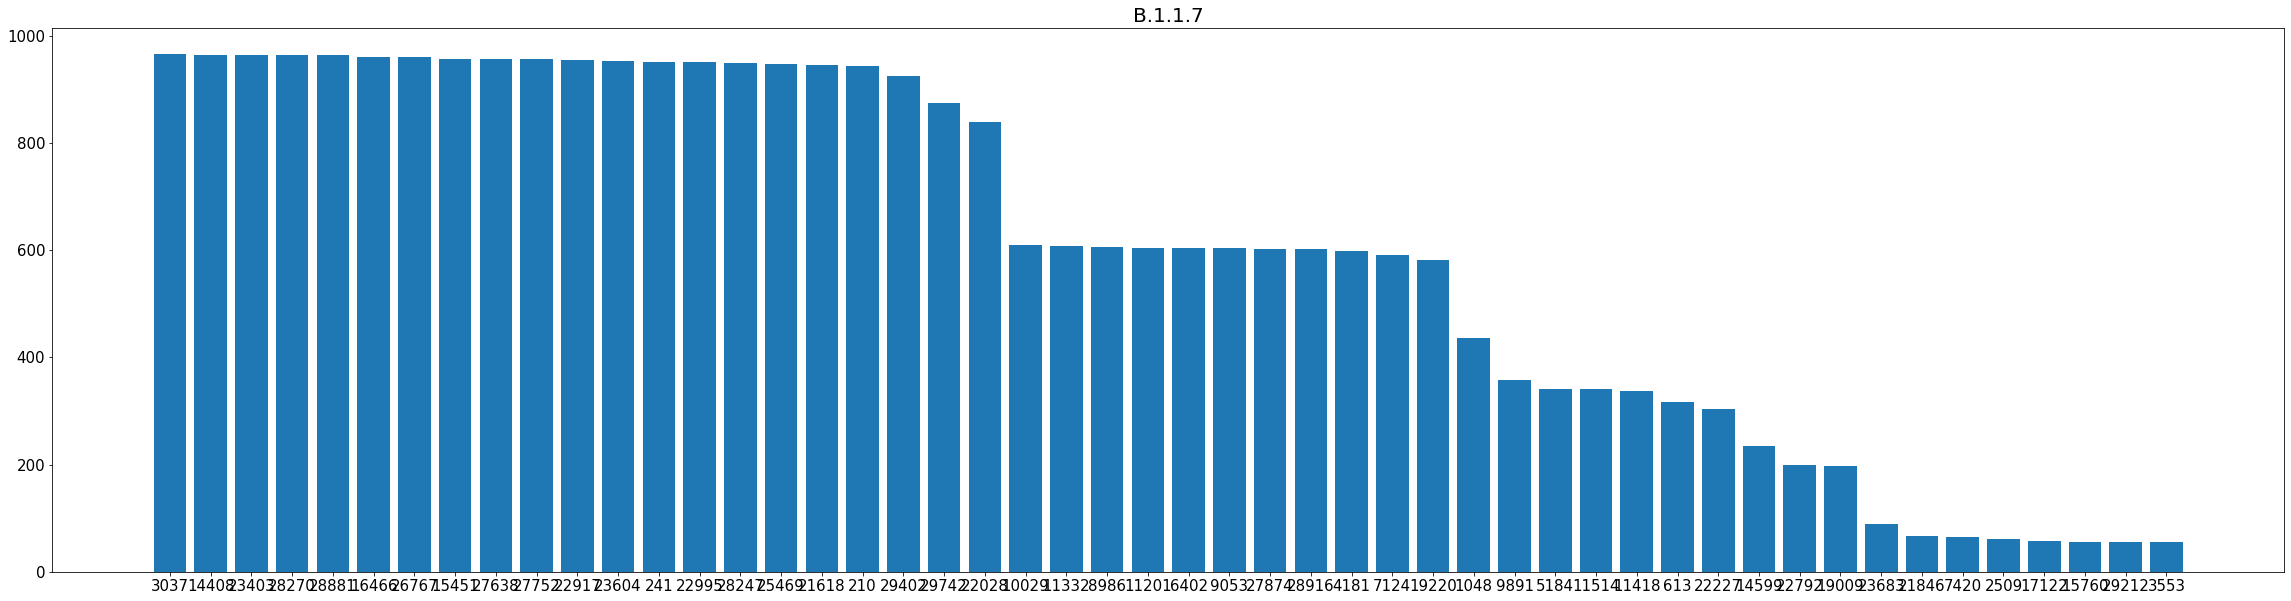

In [32]:
pos_record = {}

for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for record in test:
                if record.POS not in pos_record:
                    pos_record[record.POS] = 1
                else:
                    pos_record[record.POS] += 1

res = sorted(pos_record.items(),key = lambda item:item[1],reverse=True)
sor_res = {str(k):v for k,v in res}
plt.figure(figsize=(40, 10))
x = list(sor_res.keys())
y = list(sor_res.values())
plt.tick_params(labelsize=15)
plt.title('B.1.617.2',fontsize=20)
plt.bar(x[:50],y[:50])

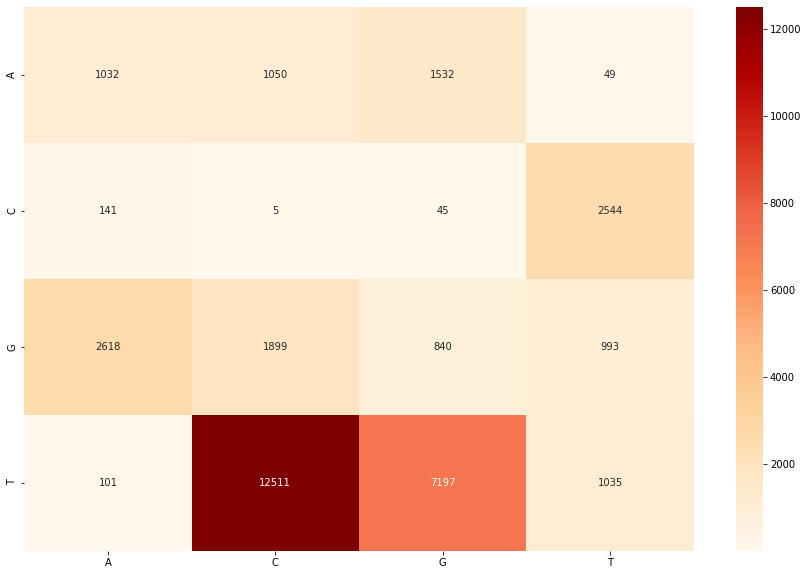

In [23]:
nucleotide_record = {'A':{'A':0,'C':0,'G':0,'T':0},'C':{'A':0,'C':0,'G':0,'T':0},
          'G':{'A':0,'C':0,'G':0,'T':0},'T':{'A':0,'C':0,'G':0,'T':0}}
nucleotide = ['A','C','G','T']
for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            for record in test:
                if record.ALT[0] in nucleotide:
                    if record.REF[0] in nucleotide:
                        nucleotide_record[record.REF[0]][str(record.ALT[0])]+=1

df = pd.DataFrame(nucleotide_record, index=nucleotide, columns=nucleotide)
plt.figure(figsize=(15,10))
sns.heatmap(df, annot=True, fmt='d',cmap="OrRd",annot_kws={'size':10})
plt.show()

# 氨基酸转换

In [24]:
df = pd.read_csv('C:/Users/Aral/Desktop/毕业论文/数据/SARS-CoV-2 lineage meta data.csv').dropna()
target = list(df[df['lineage']=='B.1.617.2']['INAB sample ID'])
file_dir = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files'
def getFlist(path):
    f = []
    for root, dirs, files in os.walk(file_dir):
        f.append(files)
    return f
file_name = getFlist(file_dir)[0]

In [25]:
nucl_pos = [265,805,2719,8554,10054,10972,11842,12091,12685,13024,
            13441,13468,16236,18039,19620,20658,21552,21562,
            25384,25392,26220,26244,26472,26522,27191,27201,27387,
            27393,27759,27887,27893,28259,28273,29533,29557,29674,29903]


label = ['outlier','NSP1','NSP2','NSP3','NSP4','NSP5','NSP6','NSP7','NSP8','NSP9',
        'NSP10','NSP12a','NSP12b','NSP13','NSP14','NSP15','NSP16','outlier',
        'S','outlier','ORF3a','outlier','E','outlier','M','outlier','ORF6',
        'outlier','ORF7a','ORF7b','outlier','ORF8','outlier','N','outlier','ORF10','outlier']

nucl_dict = {}
for i in label:
    nucl_dict[i] = 0
attr2 = list(nucl_dict.keys())

In [26]:
nucl = []

for i in range(len(file_name)):
    if i != 306:
        t = re.findall(r'V[0-9]*',file_name[i])
        if t[0] in target:
            test = vcf.Reader(filename = 'C:/Users/Aral/Desktop/毕业论文/数据/clinical_variant_files/'+file_name[i])
            nucl_dict = {}
            for i in label:
                nucl_dict[i] = 0
            for record in test:
                nucl_dict[label[bisect_left(nucl_pos,record.POS)]]+=1
            c = list(nucl_dict.values())
            c = t + c
            nucl.append(c)
nucl = pd.DataFrame(nucl)
nucl.columns = (['sample ID']+attr2)
nucl

,sample ID,outlier,NSP1,NSP2,NSP3,NSP4,NSP5,NSP6,NSP7,NSP8,...,S,ORF3a,E,M,ORF6,ORF7a,ORF7b,ORF8,N,ORF10
0,V1393,4,0,1,4,3,0,2,0,0,...,6,1,0,1,0,2,1,1,3,0
1,V1509,4,0,1,4,3,0,2,0,0,...,6,1,0,1,0,2,1,1,3,0
2,V1719,4,0,1,4,3,0,2,0,0,...,5,1,0,1,0,2,1,1,4,0
3,V1851,3,0,1,4,3,1,1,0,0,...,3,1,0,1,0,2,0,1,2,0
4,V1872,4,1,1,4,2,0,2,1,0,...,7,1,0,1,0,3,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,V4113,5,1,1,5,3,0,2,0,0,...,7,1,0,1,0,2,1,1,3,0
964,V4121,4,0,1,4,3,0,2,1,0,...,7,3,0,1,0,2,1,1,3,0
965,V4122,4,0,0,1,3,0,2,0,0,...,6,1,0,1,0,3,0,1,2,0
966,V4127,1,0,0,3,3,1,1,0,0,...,5,1,1,1,0,0,0,0,3,0


In [29]:
outputpath = 'C:/Users/Aral/Desktop/B.1.617.2_氨基酸.csv'
#nucl.to_csv(outputpath, sep=',',index=False,mode='a')

C:\Users\Aral\Anaconda3\lib\site-packages\matplotlib\collections.py:1098: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


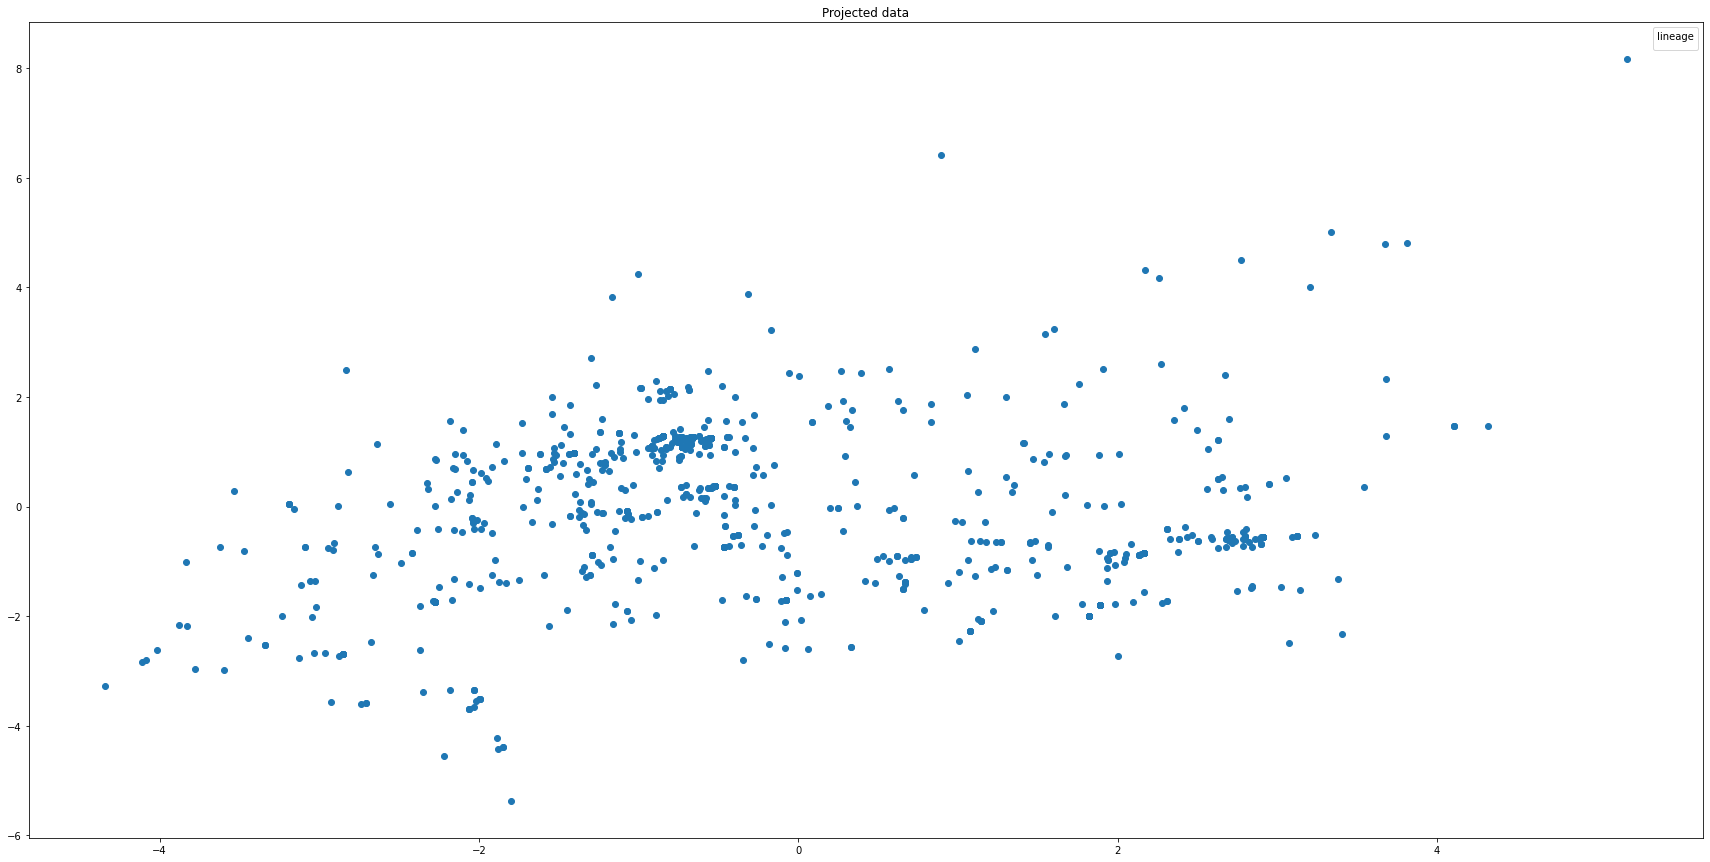

In [27]:
import numpy as np
from sklearn.decomposition import PCA

x=nucl.iloc[:,1:]

pca = PCA(n_components=2)
pca.fit(x)

# Project data onto first two principal components
projX = pca.transform(x)
plt.figure(figsize=(30,15))

scatter = plt.scatter(projX[:,0],projX[:,1],cmap='rainbow')
plt.legend(handles=scatter.legend_elements()[0],labels = scatter.legend_elements()[1],
           title="lineage")
plt.title('Projected data')
plt.show()

In [1]:
import vcf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage ,fcluster
from collections import Counter
#from sklearn.datasets.samples_generator import make_blobs
from sklearn import preprocessing
from sklearn.metrics.cluster import adjusted_rand_score
import itertools
import random
from scipy.spatial import distance as ssd
from tqdm import tqdm
import scipy
import scipy.sparse 
from scipy.stats import pearsonr
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import kneighbors_graph 
from scipy.sparse.linalg import expm
from scipy.linalg import solve_banded
from scipy.spatial.distance import pdist
import scipy.spatial.distance
import math
from sklearn.metrics.pairwise import euclidean_distances
import sklearn
import os.path
import re
import math
from sklearn.neighbors import kneighbors_graph
from sklearn.linear_model import LassoLars, Lars
from scipy.linalg import eigh
from fsfc.base import KBestFeatureSelector
plt.ion()
plt.show()

ModuleNotFoundError: No module named 'fsfc'